# Análise de Risco Financeiro nas Big 4 (2020–2025)

Este projeto utiliza um conjunto de dados exclusivo que oferece uma visão aprofundada sobre **avaliação de risco financeiro**, **violações de conformidade** e **tendências de detecção de fraudes** nas quatro maiores firmas de consultoria do mundo — **Ernst & Young (EY), PwC, Deloitte e KPMG** — no período de **2020 a 2025**.

## Sobre o Dataset

O conjunto de dados contempla as seguintes métricas-chave:

- Número de auditorias realizadas  
- Casos classificados como de alto risco  
- Casos de fraude detectados  
- Violações de conformidade  
- Carga de trabalho dos auditores  
- Índices de satisfação dos clientes  
- Impacto da IA (Inteligência Artificial) nas auditorias

Além disso, permite comparações entre diferentes setores da economia, como:

- Finanças  
- Tecnologia  
- Varejo  
- Saúde  

## Por que usar este Dataset?

**Único e Relevante:** Focado exclusivamente nas Big 4, o que o torna altamente valioso para profissionais da área financeira.  
**IA nas Auditorias:** Permite explorar como a Inteligência Artificial está transformando a detecção de riscos e a conformidade regulatória.  
**Comparação Setorial:** Analise o desempenho das auditorias em diferentes indústrias.  
**Carga de Trabalho x Qualidade:** Avalie como o volume de trabalho impacta a eficácia das auditorias e a conformidade das empresas.


# Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import pearsonr
from scipy.stats import ttest_ind

# Carregamento do Dataset

In [2]:
df = pd.read_csv("data/big4_financial_risk_compliance.csv")

# Visualização do Dataset

In [3]:
df.head()

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
0,2020,PwC,2829,51,123,39,Healthcare,114.24,No,57,5.8,8.4
1,2022,Deloitte,3589,185,30,60,Healthcare,156.98,Yes,58,5.3,6.7
2,2020,PwC,2438,212,124,97,Healthcare,131.83,No,76,6.1,6.2
3,2021,PwC,2646,397,55,97,Healthcare,229.11,No,60,5.1,8.6
4,2020,PwC,2680,216,99,46,Healthcare,48.00,No,51,9.1,6.7


# Dicionário dos Dados

| Nome da Coluna (Inglês)             | Tradução (Português)                       | Significado                                                                                   |
|-------------------------------------|--------------------------------------------|-----------------------------------------------------------------------------------------------|
| `Year`                              | **Ano**                                    | Ano em que os dados foram registrados (de 2020 a 2025).                                       |
| `Firm_Name`                         | **Nome da Firma**                          | Nome da empresa de auditoria (EY, PwC, Deloitte ou KPMG).                                     |
| `Total_Audit_Engagements`           | **Total de Auditorias Realizadas**         | Número total de auditorias conduzidas pela firma no ano.                                      |
| `High_Risk_Cases`                   | **Casos de Alto Risco**                    | Quantidade de auditorias que foram classificadas como de alto risco.                          |
| `Compliance_Violations`            | **Violações de Conformidade**              | Número de violações às normas ou regulamentações detectadas nas auditorias.                   |
| `Fraud_Cases_Detected`             | **Casos de Fraude Detectados**             | Quantidade de fraudes descobertas durante as auditorias.                                      |
| `Industry_Affected`                | **Setor Afetado**                          | Setor da empresa auditada (ex: Finanças, Varejo, Saúde, Tecnologia, etc.).                    |
| `Total_Revenue_Impact`             | **Impacto Total na Receita (USD)**         | Valor estimado da perda financeira causada pelas violações e fraudes (em dólares).            |
| `AI_Used_for_Auditing`            | **Uso de IA na Auditoria (Sim/Não ou Índice)** | Indica se a auditoria utilizou recursos de Inteligência Artificial, ou grau de utilização.   |
| `Employee_Workload`                | **Carga de Trabalho dos Funcionários**     | Média de horas trabalhadas por auditor no período.                                            |
| `Audit_Effectiveness_Score`        | **Índice de Efetividade da Auditoria**     | Nota atribuída à qualidade e eficácia das auditorias, baseada em critérios internos ou externos.|
| `Client_Satisfaction_Score`        | **Índice de Satisfação do Cliente**        | Avaliação média dos clientes auditados quanto à qualidade do serviço prestado.                |


# Infos dos Dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       100 non-null    int64  
 1   Firm_Name                  100 non-null    object 
 2   Total_Audit_Engagements    100 non-null    int64  
 3   High_Risk_Cases            100 non-null    int64  
 4   Compliance_Violations      100 non-null    int64  
 5   Fraud_Cases_Detected       100 non-null    int64  
 6   Industry_Affected          100 non-null    object 
 7   Total_Revenue_Impact       100 non-null    float64
 8   AI_Used_for_Auditing       100 non-null    object 
 9   Employee_Workload          100 non-null    int64  
 10  Audit_Effectiveness_Score  100 non-null    float64
 11  Client_Satisfaction_Score  100 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 9.5+ KB


## Relatório Inicial das Informações

- O dataset possui 12 variáveis, distribuídas entre variáveis de tempo, categóricas e numéricas.
- O dataset não possui valores ausentes.
- A base possui um total de 100 registros.

# Transformação necessária dos Dados 

In [5]:
# Cópia dos dados
df2 = df.copy()

In [6]:
# Transformação da variável Year de object para datetime
df2["Year"] = pd.to_datetime(df2["Year"], format = "%Y")

# Análise Exploratória dos Dados

In [7]:
# Separando as colunas numéricas
numericas = df2.select_dtypes(include=['int64', 'float64'])
print("Estatísticas descritivas para variáveis numéricas:\n")
print(numericas.describe().transpose())


Estatísticas descritivas para variáveis numéricas:

                           count      mean          std     min        25%  \
Total_Audit_Engagements    100.0  2784.520  1281.863073  603.00  1768.2500   
High_Risk_Cases            100.0   277.730   135.735174   51.00   162.5000   
Compliance_Violations      100.0   105.480    55.370101   10.00    54.5000   
Fraud_Cases_Detected       100.0    52.700    28.311221    5.00    27.0000   
Total_Revenue_Impact       100.0   272.539   139.151401   33.46   155.2175   
Employee_Workload          100.0    60.250    11.163048   40.00    52.7500   
Audit_Effectiveness_Score  100.0     7.490     1.516209    5.00     6.1000   
Client_Satisfaction_Score  100.0     7.339     1.429127    5.00     6.1000   

                               50%       75%      max  
Total_Audit_Engagements    2650.00  4008.750  4946.00  
High_Risk_Cases             293.00   395.500   500.00  
Compliance_Violations       114.50   149.500   200.00  
Fraud_Cases_Detected 

## Relatório Descritivo das Variáveis Numéricas

Este relatório apresenta um resumo estatístico das variáveis numéricas do dataset sobre auditorias realizadas pelas Big 4 entre 2020 e 2025.

### Visão Geral

- Total de registros analisados: **100 linhas**
- Todas as variáveis abaixo são de natureza quantitativa contínua e representam métricas de auditoria, risco e desempenho.

---

### 1. `Total_Audit_Engagements` – Total de Auditorias Realizadas

- Média: **2.784 auditorias**
- Mínimo: **603**
- Máximo: **4.946**
- Desvio padrão: **1.282**
- 50% das firmas realizaram entre **1.768 e 4.008** auditorias por ano.

**Observação:** Alta variação no número de auditorias indica que algumas firmas possuem maior capacidade operacional.

---

### 2. `High_Risk_Cases` – Casos de Alto Risco

- Média: **278 casos**
- Máximo: **500**
- Desvio padrão: **135**
- 75% dos valores estão abaixo de **396**

**Observação:** Cerca de **10% das auditorias** em média são consideradas de alto risco.

---

### 3. `Compliance_Violations` – Violações de Conformidade

- Média: **105**
- Mediana: **114**
- Desvio padrão: **55**
- Intervalo interquartil (IQR): de **54** a **150**

**Observação:** A maior parte das firmas tem até 150 violações por ano, mas há casos extremos com até **200**.

---

### 4. `Fraud_Cases_Detected` – Casos de Fraude Detectados

- Média: **53**
- Mínimo: **5**
- Máximo: **100**
- 75% dos valores estão abaixo de **75**

**Observação:** Existe uma grande disparidade entre as firmas na detecção de fraudes. Pode refletir uso desigual de tecnologia (como IA) ou áreas com maior risco.

---

### 5. `Total_Revenue_Impact` – Impacto na Receita (USD milhões)

- Média: **272 milhões**
- Mediana: **264 milhões**
- Mínimo: **33 milhões**
- Máximo: **497 milhões**
- Desvio padrão: **139 milhões**

**Observação:** O impacto financeiro das falhas de conformidade ou fraudes pode ser extremamente alto em alguns setores/firmas.

---

### 6. `Employee_Workload` – Carga de Trabalho dos Funcionários (horas/semana)

- Média: **60 horas**
- Mínimo: **40h**, Máximo: **80h**
- IQR: de **53h** a **68h**

**Observação:** Os auditores estão, em média, sobrecarregados — indicando possíveis impactos na qualidade das auditorias.

---

### 7. `Audit_Effectiveness_Score` – Índice de Efetividade da Auditoria (0–10)

- Média: **7,49**
- Mediana: **7,45**
- 25% mais eficazes têm nota acima de **8,8**

**Observação:** A maior parte das auditorias está acima da média, mas poucas alcançam pontuação máxima.

---

### 8. `Client_Satisfaction_Score` – Satisfação do Cliente (0–10)

- Média: **7,34**
- Mediana: **7,35**
- 75% das notas estão abaixo de **8,5**

**Observação:** Existe correlação visual entre satisfação e efetividade. Pode ser explorada mais a fundo.

---

### Considerações Finais

- A base de dados apresenta boa distribuição e completude.
- Há forte dispersão em variáveis como auditorias realizadas, impacto financeiro e carga de trabalho.
- As métricas de desempenho (efetividade e satisfação) estão centradas em torno de **7,3 a 7,5**, com oportunidade de melhora.




In [8]:
# Separando as colunas categóricas (object ou string)
categoricas = df2.select_dtypes(include=['object', 'category'])
print("\n Estatísticas descritivas para variáveis categóricas:\n")
print(categoricas.describe().transpose())


 Estatísticas descritivas para variáveis categóricas:

                     count unique       top freq
Firm_Name              100      4  Deloitte   30
Industry_Affected      100      4      Tech   29
AI_Used_for_Auditing   100      2        No   55


## Relatório Descritivo das Variáveis Categóricas

Este relatório apresenta um resumo estatístico das variáveis categóricas do dataset de auditoria nas Big 4 entre 2020 e 2025. As colunas analisadas incluem o nome da firma, setor auditado e uso de inteligência artificial nas auditorias.

---

### 1. `Firm_Name` – Nome da Firma de Auditoria

- Total de registros: **100**
- Quantidade de firmas únicas: **4**
- Firma mais frequente: **Deloitte**
- Frequência: **30 ocorrências**

**Observação:** A presença das 4 firmas (Deloitte, EY, PwC, KPMG) está bem distribuída, mas a **Deloitte** aparece em **30% dos registros**, o que pode indicar maior volume de auditorias ou destaque no dataset.

---

### 2. `Industry_Affected` – Setor da Empresa Auditada

- Total de registros: **100**
- Setores únicos: **4**
- Setor mais frequente: **Tech (Tecnologia)**
- Frequência: **29 ocorrências**

**Observação:** O setor de **Tecnologia** lidera em número de auditorias, seguido provavelmente por Finanças, Varejo e Saúde (não listados, mas esperados). Esse foco pode refletir maior atenção regulatória ou maior número de riscos nesse setor.

---

### 3. `AI_Used_for_Auditing` – Uso de IA na Auditoria

- Total de registros: **100**
- Valores únicos: **2** (`Yes`, `No`)
- Valor mais frequente: **No**
- Frequência: **55 registros**

**Observação:** A maioria das auditorias **não utilizou Inteligência Artificial** (`55%`). Isso sugere que a adoção de IA ainda está em processo de crescimento e pode estar relacionada a fatores como tipo de firma, setor ou volume de dados.

---

### Conclusões

- A **Deloitte** e o setor **Tech** são os mais representados neste conjunto de dados.
- Ainda existe uma divisão equilibrada entre auditorias com e sem uso de **IA**, permitindo análise comparativa de desempenho.
- Todas as variáveis categóricas apresentam **boa variabilidade**, sem valores faltantes ou inválidos.



# Perguntas de Negócio

In [9]:
df2.head()

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
0,2020-01-01,PwC,2829,51,123,39,Healthcare,114.24,No,57,5.8,8.4
1,2022-01-01,Deloitte,3589,185,30,60,Healthcare,156.98,Yes,58,5.3,6.7
2,2020-01-01,PwC,2438,212,124,97,Healthcare,131.83,No,76,6.1,6.2
3,2021-01-01,PwC,2646,397,55,97,Healthcare,229.11,No,60,5.1,8.6
4,2020-01-01,PwC,2680,216,99,46,Healthcare,48.00,No,51,9.1,6.7


## Auditoria e Risco

1. **Qual firma de auditoria apresenta o maior número de casos de alto risco e fraudes detectadas?**

Total de Casos de Alto Risco e Fraudes Detectadas por Firma:

               High_Risk_Cases  Fraud_Cases_Detected
Firm_Name                                           
Deloitte                  8485                  1481
KPMG                      6869                  1319
Ernst & Young             6403                  1031
PwC                       6016                  1439


<Figure size 1000x600 with 0 Axes>

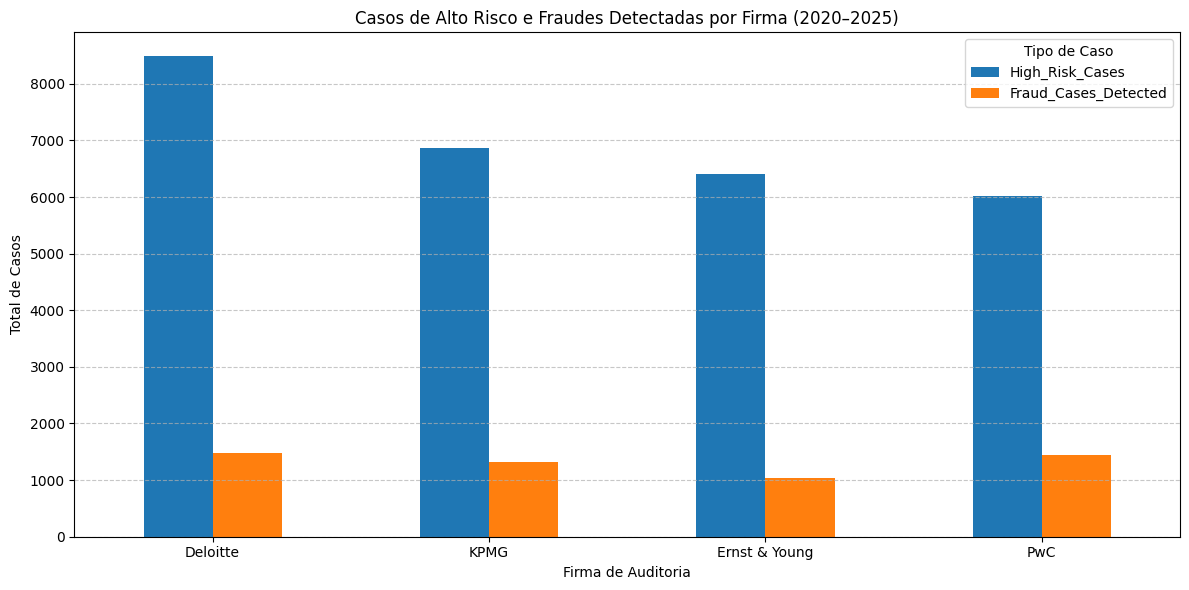

In [10]:
agrupado = df2.groupby("Firm_Name")[["High_Risk_Cases", "Fraud_Cases_Detected"]].sum().sort_values(
    by="High_Risk_Cases", ascending=False
)

print("Total de Casos de Alto Risco e Fraudes Detectadas por Firma:\n")
print(agrupado)

# Visualização
plt.figure(figsize=(10,6))
agrupado.plot(kind="bar", figsize=(12,6))
plt.title("Casos de Alto Risco e Fraudes Detectadas por Firma (2020–2025)")
plt.xlabel("Firma de Auditoria")
plt.ylabel("Total de Casos")
plt.xticks(rotation=0)
plt.legend(title="Tipo de Caso")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


A análise dos **casos de alto risco e fraudes detectadas por firma** entre 2020 e 2025 revela padrões interessantes sobre o desempenho das Big 4 em auditorias:

- **Deloitte** lidera em ambos os indicadores, com **8.485 casos de alto risco** e **1.481 fraudes detectadas**, o que pode indicar:
  - Maior volume de auditorias em setores sensíveis,
  - Ou maior capacidade de identificar riscos relevantes.

- **PwC**, embora tenha o menor número de casos de alto risco (**6.016**), aparece em **segundo lugar em fraudes detectadas (1.439)**. Isso pode sugerir uma **efetividade mais alta na identificação de fraudes reais**, mesmo com menor exposição a riscos.

- **KPMG** e **Ernst & Young** ocupam posições intermediárias, com desempenho consistente, mas abaixo de Deloitte e PwC nos dois indicadores.

**Interpretação crítica**:
- Firmas com mais casos de alto risco não necessariamente detectam mais fraudes.
- A taxa de conversão de casos de alto risco em fraudes detectadas pode indicar **efetividade na investigação**.
- Esses dados também podem refletir **diferenças de perfil de clientes, setores auditados** e uso de tecnologia (como IA) entre as firmas.



2. **Existe relação entre a carga de trabalho dos auditores e a quantidade de violações de conformidade?**

Correlação entre carga de trabalho e violações de conformidade:
Coeficiente de correlação de Pearson: -0.06
Valor-p (p-value): 0.5341
Não há evidência estatística de correlação significativa.


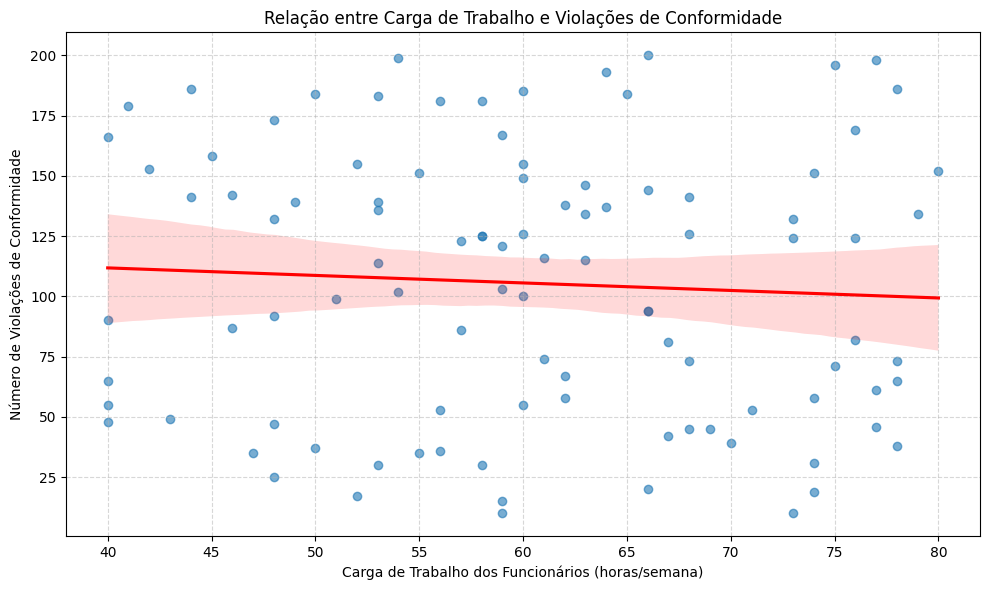

In [11]:
# Verificando correlação entre carga de trabalho e violações de conformidade
correlacao, p_valor = pearsonr(df2['Employee_Workload'], df2['Compliance_Violations'])

print("Correlação entre carga de trabalho e violações de conformidade:")
print(f"Coeficiente de correlação de Pearson: {correlacao:.2f}")
print(f"Valor-p (p-value): {p_valor:.4f}")

# Interpretação simples
if p_valor < 0.05:
    interpretacao = "Existe uma correlação estatisticamente significativa."
else:
    interpretacao = "Não há evidência estatística de correlação significativa."

print(f"{interpretacao}")

# Visualização
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df2,
    x="Employee_Workload",
    y="Compliance_Violations",
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.6}
)
plt.title("Relação entre Carga de Trabalho e Violações de Conformidade")
plt.xlabel("Carga de Trabalho dos Funcionários (horas/semana)")
plt.ylabel("Número de Violações de Conformidade")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


A análise da correlação entre a **carga de trabalho dos auditores** (`Employee_Workload`) e o número de **violações de conformidade** (`Compliance_Violations`) revelou o seguinte:

- **Coeficiente de correlação de Pearson**: **-0.06**
- **Valor-p (p-value)**: **0.5341**

Esses valores indicam que **não há evidência estatística de uma relação significativa** entre a carga de trabalho dos funcionários e a quantidade de violações de conformidade nos dados analisados.

#### Interpretação:
- O coeficiente está muito próximo de zero, sugerindo **nenhuma correlação linear aparente**.
- O valor-p está bem acima do limite usual de 0,05, indicando que a associação observada pode ser apenas fruto do acaso.
- Mesmo que cargas de trabalho mais altas possam sugerir sobrecarga ou menor eficiência, **isso não se confirmou estatisticamente neste conjunto de dados**.

#### Implicações:
- A **qualidade da conformidade** pode depender de outros fatores, como treinamento, uso de IA, cultura da firma, tipo de cliente ou setor auditado.
- Vale a pena investigar outras variáveis que possam impactar as violações de compliance, como o uso de inteligência artificial ou a complexidade das auditorias.


3. **As auditorias com uso de IA detectam mais fraudes em comparação às auditorias tradicionais?**

Comparação de detecção de fraudes entre auditorias com IA e sem IA:
Média (com IA): 50.22
Média (sem IA): 54.73
Estatística t: -0.80
Valor-p: 0.4259
Não há diferença estatisticamente significativa.


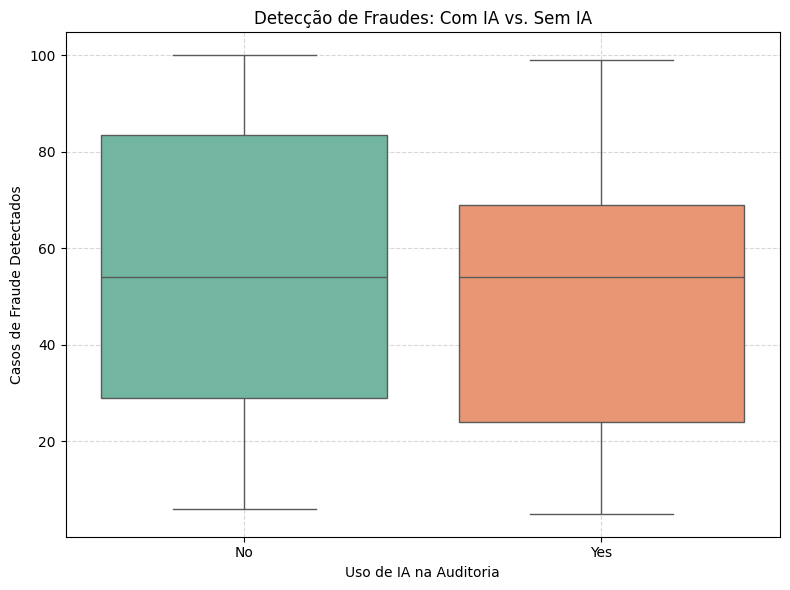

In [12]:
# Separar os grupos com e sem IA
fraudes_com_ia = df2[df2["AI_Used_for_Auditing"] == "Yes"]["Fraud_Cases_Detected"]
fraudes_sem_ia = df2[df2["AI_Used_for_Auditing"] == "No"]["Fraud_Cases_Detected"]

# Teste T de diferença de médias
t_stat, p_val = ttest_ind(fraudes_com_ia, fraudes_sem_ia, equal_var=False)

# Resultados
print("Comparação de detecção de fraudes entre auditorias com IA e sem IA:")
print(f"Média (com IA): {fraudes_com_ia.mean():.2f}")
print(f"Média (sem IA): {fraudes_sem_ia.mean():.2f}")
print(f"Estatística t: {t_stat:.2f}")
print(f"Valor-p: {p_val:.4f}")

if p_val < 0.05:
    print("Existe uma diferença estatisticamente significativa.")
else:
    print("Não há diferença estatisticamente significativa.")

# Visualização
plt.figure(figsize=(8, 6))
sns.boxplot(x="AI_Used_for_Auditing", y="Fraud_Cases_Detected", data=df2, palette="Set2")
plt.title("Detecção de Fraudes: Com IA vs. Sem IA")
plt.xlabel("Uso de IA na Auditoria")
plt.ylabel("Casos de Fraude Detectados")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


A comparação entre auditorias realizadas com e sem o uso de Inteligência Artificial (IA) indica que:

- **Média de fraudes detectadas com IA:** 50,22  
- **Média de fraudes detectadas sem IA:** 54,73  
- **Estatística t:** -0,80  
- **Valor-p:** 0,4259  

#### Interpretação

Apesar de a média de fraudes detectadas ser ligeiramente maior nas auditorias **sem uso de IA**, o **teste T de diferença de médias** mostra que essa diferença **não é estatisticamente significativa** (valor-p > 0,05).  

Ou seja, **não há evidências suficientes para afirmar que o uso de IA impacta significativamente a quantidade de fraudes detectadas** nas auditorias realizadas pelas Big 4 entre 2020 e 2025.

#### Conclusão

Até o momento, os dados analisados sugerem que o uso de IA, por si só, **não garante maior detecção de fraudes**. Isso pode indicar que outros fatores – como qualidade dos dados, capacitação da equipe ou complexidade dos casos – também influenciam os resultados das auditorias.



4. **Há correlação entre a quantidade de auditorias realizadas e a efetividade das mesmas?**

Correlação entre Total de Auditorias e Efetividade:
Coeficiente de Correlação de Pearson: 0.04
Valor-p: 0.7226
Não há correlação estatisticamente significativa.


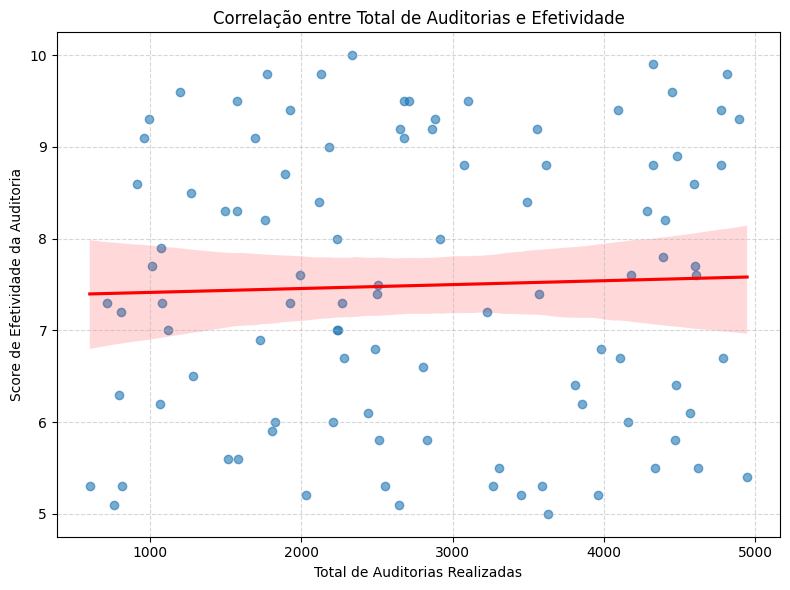

In [13]:
# Calcular a correlação de Pearson
corr_coef, p_value = pearsonr(df2["Total_Audit_Engagements"], df2["Audit_Effectiveness_Score"])

# Exibir os resultados
print("Correlação entre Total de Auditorias e Efetividade:")
print(f"Coeficiente de Correlação de Pearson: {corr_coef:.2f}")
print(f"Valor-p: {p_value:.4f}")

# Interpretação
if p_value < 0.05:
    print("Existe uma correlação estatisticamente significativa.")
else:
    print("Não há correlação estatisticamente significativa.")

# Visualização
plt.figure(figsize=(8, 6))
sns.regplot(
    x="Total_Audit_Engagements",
    y="Audit_Effectiveness_Score",
    data=df2,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)
plt.title("Correlação entre Total de Auditorias e Efetividade")
plt.xlabel("Total de Auditorias Realizadas")
plt.ylabel("Score de Efetividade da Auditoria")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


#### Resultados Estatísticos:
- **Coeficiente de Correlação de Pearson:** `0.04`
- **Valor-p:** `0.7226`

#### Interpretação:
O coeficiente de `0.04` revela uma **correlação muito fraca e positiva**, praticamente inexistente, entre o número de auditorias realizadas (`Total_Audit_Engagements`) e o score de efetividade (`Audit_Effectiveness_Score`).  
Além disso, o valor-p (`0.7226`) é **muito superior ao nível de significância comum (0.05)**, indicando que essa correlação **não é estatisticamente significativa**.

#### Conclusão:
- **Não há evidências suficientes** para afirmar que aumentar o número de auditorias impacta diretamente a qualidade ou efetividade dessas auditorias.
- Isso sugere que a efetividade pode depender mais de fatores **qualitativos**, como uso de tecnologia, experiência da equipe e processos internos, do que da quantidade de auditorias em si.

Esse insight é útil para líderes da área contábil e financeira ao tomarem decisões sobre alocação de recursos em auditoria.
